In [1]:
import astropy.io.fits as fits
import astropy.units as u
import scipy
import poppy
import poppy.poppy_core as pc

import proper
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import logging,sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

from importlib import reload
reload(poppy); reload(pc)

lambda_m = 730e-9*u.m
D = 2.3633372*u.m

as_per_lamD = (lambda_m/D*u.radian).to(u.arcsecond); print(as_per_lamD)
fov = 9*as_per_lamD; print(fov)

c:\users\jaren\miniconda3\lib\site-packages\pysynphot\locations.py:47: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\locations.py:346: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for http://ssb.stsci.edu/cdbs_open/cdbs\mtab\*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
c:\users\jaren\miniconda3\lib\site-packages\pysynphot\refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for http://ssb.stsci.edu/cdbs_open/cdbs\mtab\*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


0.06371215608182376 arcsec
0.5734094047364139 arcsec


In [2]:
fl_pri = 2.83459423440 * 1.0013*u.m
d_pri_sec = 2.285150515460035*u.m
d_focus_sec = d_pri_sec - fl_pri
fl_sec = -0.653933011 * 1.0004095*u.m
d_sec_focus = 3.580188916677103*u.m
diam_sec = 0.58166*u.m
d_sec_fold1 = 2.993753476654728*u.m
d_fold1_focus = 0.586435440022375*u.m
diam_fold1 = 0.09*u.m
d_fold1_m3 = 1.680935841598811*u.m
fl_m3 = 0.430216463069001*u.m
d_focus_m3 = 1.094500401576436*u.m
d_m3_pupil = 0.469156807701977*u.m
d_m3_focus = 0.708841602661368*u.m
diam_m3 = 0.2*u.m
d_m3_m4 = 0.943514749358944*u.m
fl_m4 = 0.116239114833590*u.m
d_focus_m4 = 0.234673014520402*u.m
d_m4_pupil = 0.474357941656967*u.m
d_m4_focus = 0.230324117970585*u.m
diam_m4 = 0.07*u.m
d_m4_m5 = 0.429145636743193*u.m
d_m5_focus = 0.198821518772608*u.m
fl_m5 = 0.198821518772608*u.m
d_m5_pupil = 0.716529242882632*u.m
diam_m5 = 0.07*u.m
d_m5_fold2 = 0.351125431220770*u.m
diam_fold2 = 0.06*u.m
d_fold2_fsm = 0.365403811661862*u.m
d_fsm_oap1 = 0.354826767220001*u.m
fl_oap1 = 0.503331895563883*u.m
diam_oap1 = 0.06*u.m
d_oap1_focm = 0.768005607094041*u.m
d_focm_oap2 = 0.314483210543378*u.m
fl_oap2 = 0.579156922073536*u.m
diam_oap2 = 0.06*u.m
d_oap2_dm1 = 0.775775726154228*u.m
d_dm1_dm2 = 1.0*u.m
d_dm2_oap3 = 0.394833855161549*u.m
fl_oap3 = 1.217276467668519*u.m
diam_oap3 = 0.06*u.m
d_oap3_fold3 = 0.505329955078121*u.m
diam_fold3 = 0.06*u.m
d_fold3_oap4 = 1.158897671642761*u.m
fl_oap4 = 0.446951159052363*u.m
diam_oap4 = 0.06*u.m
d_oap4_pupilmask = 0.423013568764728*u.m
d_pupilmask_oap5 = 0.408810648253099*u.m
fl_oap5 =  0.548189351937178*u.m
diam_oap5 = 0.06*u.m
d_oap5_fpm = 0.548189083164429*u.m
d_fpm_oap6 = 0.548189083164429*u.m
fl_oap6 = 0.548189083164429*u.m
diam_oap6 = 0.06*u.m
d_oap6_lyotstop = 0.687567667550736*u.m
d_lyotstop_oap7 = 0.401748843470518*u.m
fl_oap7 = 0.708251083480054*u.m
diam_oap7 = 0.06*u.m
d_oap7_fieldstop = 0.708251083480054*u.m  
d_fieldstop_oap8 = 0.210985967281651*u.m
fl_oap8 = 0.210985967281651*u.m
diam_oap8 = 0.06*u.m
d_oap8_pupil = 0.238185804200797*u.m
d_oap8_filter = 0.368452268225530*u.m
diam_filter = 0.01*u.m
d_filter_lens = 0.170799548215162*u.m
fl_lens = 0.246017378417573*u.m + 0.050001306014153*u.m
diam_lens = 0.01*u.m
d_lens_fold4 = 0.246017378417573*u.m
diam_fold4 = 0.02*u.m
d_fold4_image = 0.050001578514650*u.m
fl_pupillens = 0.149260576823040*u.m   

# Define all the optical elements with power.

In [3]:
primary = poppy.QuadraticLens(fl_pri, name='Primary')
secondary = poppy.QuadraticLens(fl_sec, name='Secondary')
m3 = poppy.QuadraticLens(fl_m3, name='M3')
m4 = poppy.QuadraticLens(fl_m4, name='M4')
m5 = poppy.QuadraticLens(fl_m5, name='M5')
oap1 = poppy.QuadraticLens(fl_oap1, name='OAP1')
oap2 = poppy.QuadraticLens(fl_oap2, name='OAP2')
oap3 = poppy.QuadraticLens(fl_oap3, name='OAP3')
oap4 = poppy.QuadraticLens(fl_oap4, name='OAP4')
oap5 = poppy.QuadraticLens(fl_oap5, name='OAP5')
oap6 = poppy.QuadraticLens(fl_oap6, name='OAP6')
oap7 = poppy.QuadraticLens(fl_oap7, name='OAP7')
oap8 = poppy.QuadraticLens(fl_oap8, name='OAP8')
lens = poppy.QuadraticLens(fl_lens, name='LENS')
image = poppy.ScalarTransmission(planetype=pc.PlaneType.intermediate, name='focus')

DEBUG:poppy:Initialized: Primary, fl =2.84e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.54e-01 m
DEBUG:poppy:Initialized: M3, fl =4.30e-01 m
DEBUG:poppy:Initialized: M4, fl =1.16e-01 m
DEBUG:poppy:Initialized: M5, fl =1.99e-01 m
DEBUG:poppy:Initialized: OAP1, fl =5.03e-01 m
DEBUG:poppy:Initialized: OAP2, fl =5.79e-01 m
DEBUG:poppy:Initialized: OAP3, fl =1.22e+00 m
DEBUG:poppy:Initialized: OAP4, fl =4.47e-01 m
DEBUG:poppy:Initialized: OAP5, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP6, fl =5.48e-01 m
DEBUG:poppy:Initialized: OAP7, fl =7.08e-01 m
DEBUG:poppy:Initialized: OAP8, fl =2.11e-01 m
DEBUG:poppy:Initialized: LENS, fl =2.96e-01 m


# Define the initial telescope pupil, the pupil mask, the FPM, and the lyot stop.

C:\Users\jaren\Desktop\webbpsf-test\spc_20190130
0.0031856078040911878 arcsec / pix
DEBUG:poppy:Trans: C:\Users\jaren\Desktop\webbpsf-test\spc_20190130\pupil_SPC-20190130_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from C:\Users\jaren\Desktop\webbpsf-test\spc_20190130\pupil_SPC-20190130_rotated.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.0023633372
0.0023633372 m / pix 

DEBUG:poppy:Trans: C:\Users\jaren\Desktop\webbpsf-test\spc_20190130\SPM_SPC-20190130.fits
DEBUG:poppy:OPD: None
INFO:poppy:Shaped Pupil Mask: Loaded amplitude transmission from C:\Users\jaren\Desktop\webbpsf-test\spc_20190130\SPM_SPC-20190130.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 1.70005966366624e-05
1.70005966366624e-05 m / pix 

DEBUG:poppy:Trans: C:\Users\jaren\Desktop\webbpsf-test\spc_20190130\fpm_0.05lamdivD.fits
DEBUG:poppy:OPD: None
INFO:poppy:Focal Plane Mask: Loaded amplitude transmission from C:\Users\ja

TypeError: 'method' object is not subscriptable

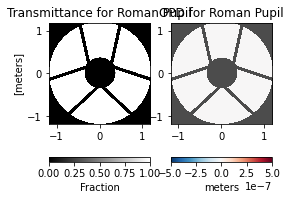

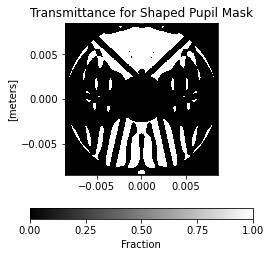

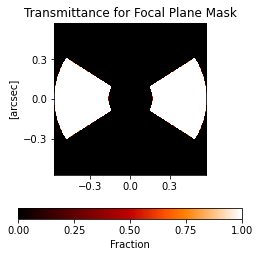

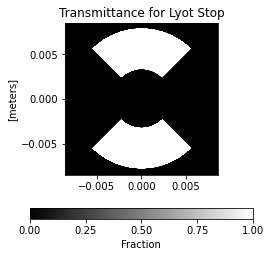

In [17]:
reload(poppy); reload(pc)
spc730dir = Path(os.getcwd()+'/spc_20190130'); print(spc730dir)

pupil_fpath = str(spc730dir/'pupil_SPC-20190130_rotated.fits')
spm_fpath = str(spc730dir/'SPM_SPC-20190130.fits')
fpm_fpath = str(spc730dir/'fpm_0.05lamdivD.fits')
ls_fpath = str(spc730dir/'LS_SPC-20190130.fits')

#
fpm_sampling = 0.05 # lam/D
fpm_sampling = 0.05*lambda_m/D*180/np.pi*3600; print(fpm_sampling*u.arcsec/u.pixel)
#


pupil = poppy.FITSOpticalElement('Roman Pupil',
                                 pupil_fpath, pixelscale=0.0023633372,
                                 planetype=pc.PlaneType.pupil); print(pupil.pixelscale,'\n')


SPM = poppy.FITSOpticalElement('Shaped Pupil Mask', spm_fpath,
                               pixelscale=1.70005966366624e-05,
                               planetype=pc.PlaneType.pupil); print(SPM.pixelscale,'\n')

FPM = poppy.FITSOpticalElement('Focal Plane Mask', fpm_fpath, 
                               pixelscale=fpm_sampling, #fov_arcsec=fpm_sampling*361,
                               planetype=pc.PlaneType.image); print(FPM.pixelscale,'\n')

LS = poppy.FITSOpticalElement('Lyot Stop', ls_fpath, 
                              pixelscale=1.7000357988404796e-05,
                              planetype=pc.PlaneType.pupil); print(LS.pixelscale,'\n')

figwidth = 4
figheight = 4
plt.figure(figsize=(figwidth,figheight)); pupil.display(what='both')
plt.figure(figsize=(figwidth,figheight)); SPM.display()
plt.figure(figsize=(figwidth,figheight)); FPM.display()
plt.figure(figsize=(figwidth,figheight)); LS.display()

dm1_fpath = str(spc730dir/'spc-spec_long_with_aberrations_dm1.fits')
dm2_fpath = str(spc730dir/'spc-spec_long_with_aberrations_dm2.fits')

use_dms = False
use_fieldstop = False

if use_dms:
    dm1 = poppy.FITSOpticalElement('DM1', opd=dm1_fpath, opdunits='meters',
                                   planetype=pc.PlaneType.intermediate)
    dm2 = poppy.FITSOpticalElement('DM2',opd=dm2_fpath, opdunits='meters',
                                   planetype=pc.PlaneType.intermediate)

    figwidth = 4
    figheight = 4
    plt.figure(figsize=(figwidth,figheight)); dm1.display(what='both')
    plt.figure(figsize=(figwidth,figheight)); dm2.display(what='both')
    
if use_fieldstop:
    fieldstop = poppy.CircularAperture('Field Stop Plane (Circular Aperture)', radius=focal_plane_diam.value/4)
    
xtilt = 0*1e-9 # I have not converted the offset in LambdaD to the corresponding zernike
ytilt = 0

# proper.prop_multiply( wavefront, np.exp(complex(0,1) * np.pi * (xtilt_lam * x + ytilt_lam * y)) )
tilt = poppy.ZernikeWFE(radius=D/2, 
                        coefficients=[0, xtilt, ytilt],
                        aperture_stop=False)

#tilt.display(what='both')



# Initialize the first portion of the optics.

In [7]:
reload(poppy)
# create the optical system
npix = 1000
oversample = 2
beam_ratio = 1/oversample

spc1 = poppy.FresnelOpticalSystem(name='SPC Part 1', pupil_diameter=D,
                                  npix=npix, beam_ratio=beam_ratio, verbose=True)
spc1.add_optic(pupil)

# spc1.add_optic(tilt)

spc1.add_optic(primary)

spc1.add_optic(secondary, distance=d_pri_sec)
spc1.add_optic(poppy.CircularAperture(radius=diam_sec/2,name="Secondary aperture"))

spc1.add_optic(m3, distance=d_sec_fold1 + d_fold1_m3)
spc1.add_optic(poppy.CircularAperture(radius=diam_m3/2,name="M-3 aperture"))

spc1.add_optic(m4, distance=d_m3_m4)
spc1.add_optic(poppy.CircularAperture(radius=diam_m4/2,name="M-4 aperture"))

spc1.add_optic(m5, distance=d_m4_m5)
spc1.add_optic(poppy.CircularAperture(radius=diam_m5/2,name="M-5 aperture"))

spc1.add_optic(oap1, distance=d_m5_fold2 + d_fold2_fsm + d_fsm_oap1)
spc1.add_optic(poppy.CircularAperture(radius=diam_oap1/2,name="OAP1 aperture"))

if use_dms:
    spc1.add_optic(oap2, distance=d_oap1_focm + d_focm_oap2)
    spc1.add_optic(poppy.CircularAperture(radius=diam_oap2/2,name="OAP2 aperture"))

    spc1.add_optic(dm1, distance=d_oap2_dm1) # now to the DMs
    spc1.add_optic(dm2, distance=d_dm1_dm2)

    spc1.add_optic(oap3, distance=d_dm2_oap3)
else:
    spc1.add_optic(oap2, distance=d_oap1_focm + d_focm_oap2)
    spc1.add_optic(poppy.CircularAperture(radius=diam_oap2/2,name="OAP2 aperture"))
    
    spc1.add_optic(oap3, distance=d_oap2_dm1 + d_dm1_dm2 + d_dm2_oap3)
spc1.add_optic(poppy.CircularAperture(radius=diam_oap3/2,name="OAP3 aperture"))

spc1.add_optic(oap4, distance=d_oap3_fold3 + d_fold3_oap4)
spc1.add_optic(poppy.CircularAperture(radius=diam_oap4/2,name="OAP4 aperture"))

spc1.add_optic(SPM, distance=d_oap4_pupilmask + 0)#0.188*u.m) # why add 0.188

# spc1.add_optic(oap5, distance=d_pupilmask_oap5)
spc1.add_optic(poppy.CircularAperture(radius=diam_oap5/2,name="OAP5 aperture"), distance=d_pupilmask_oap5)

spc1.describe()

psf,wfs = spc1.calc_psf(wavelength=lambda_m, display_intermediates=True, return_intermediates=True)
wf_int = wfs[-1].intensity
wf_phs = wfs[-1].phase
n = wf_int.shape[0]
ext = wfs[-1].pixelscale.value * n/2
extent = [-ext,ext,-ext,ext]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4),dpi=150)
im1=ax[0].imshow(wf_int, norm=LogNorm(), extent=extent, cmap='magma')
fig.colorbar(im1,ax=ax[0])
im2=ax[1].imshow(wf_phs, extent=extent, cmap='magma')
fig.colorbar(im2,ax=ax[1])

INFO:poppy:Initialized OpticalSystem: SPC Part 1
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 4.67e+00 m 
INFO:poppy:Added optic: M-3 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M-4 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M-5 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 1.07e+00 m 
INFO:poppy:Added optic: OAP1 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP2 after separation: 1.08e+00 m 
INFO:poppy:Added optic: OAP2 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP3 after separation: 2.17e+00 m 
I

ValueError: Wavefronts can only be *= multiplied by OpticalElements or scalar values

In [8]:
reload(poppy)
spc_fpm = poppy.OpticalSystem(name='SPC FPM', pupil_diameter=diam_oap5)

spc_fpm.add_pupil(poppy.CircularAperture(radius=diam_oap5/2,name="OAP5 aperture"))

FPM.propagation_hint='MFT'
use_fpm = True
if use_fpm:
    spc_fpm.add_image(FPM)
else:
    spc_fpm.add_image(poppy.CircularAperture(radius=diam_oap5/2,name="FPM (None)"))
    
spc_fpm.add_pupil(poppy.CircularAperture(radius=diam_oap6/2,name="OAP6 aperture"))

spc_fpm.calc_psf(wavelength=lambda_m, display_intermediates=True)

INFO:poppy:Initialized OpticalSystem: SPC FPM


TypeError: Not sure how to handle an Optic input of the provided type, <class 'poppy.optics.CircularAperture'>

In [84]:
# input the wavefront to the rest of the optics
npix = 1000
oversample = 2
beam_ratio = 1/oversample
spc2 = poppy.FresnelOpticalSystem(pupil_diameter=diam_oap6,
                                  npix=npix, beam_ratio=beam_ratio, verbose=True)

spc2.add_optic(oap6, distance=d_fpm_oap6)
spc2.add_optic(poppy.CircularAperture(radius=diam_oap6/2,name="OAP6 aperture"))

spc2.add_optic(LS, distance=d_oap6_lyotstop)

spc2.add_optic(oap7, distance=d_lyotstop_oap7)
spc2.add_optic(poppy.CircularAperture(radius=diam_oap7/2,name="OAP7 aperture"))

if use_fieldstop:
    spc2.add_optic(fieldstop, distance=d_oap7_fieldstop)
    spc2.add_optic(oap8, distance=d_fieldstop_oap8)
else:
    spc2.add_optic(oap8, distance=d_oap7_fieldstop + d_fieldstop_oap8)
spc2.add_optic(poppy.CircularAperture(radius=diam_oap8/2,name="OAP8 aperture"))

spc2.add_optic(lens, distance=d_oap8_filter + d_filter_lens)

spc2.add_optic(image, distance=d_lens_fold4 + d_fold4_image)

spc2.describe()

psf,wfs = spc1.calc_psf(wavelength=lambda_m, display_intermediates=True, return_intermediates=True)
wf_int = wfs[-2].intensity
wf_phs = wfs[-2].phase
n = wf_int.shape[0]
ext = wfs[-2].pixelscale.value * n/2
extent = [-ext,ext,-ext,ext]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4),dpi=150)
im1=ax[0].imshow(wf_int, norm=LogNorm(), extent=extent, cmap='magma')
fig.colorbar(im1,ax=ax[0])
im2=ax[1].imshow(wf_phs, extent=extent, cmap='magma')
fig.colorbar(im2,ax=ax[1])

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: OAP6 after separation: 5.48e-01 m 
INFO:poppy:Added optic: OAP6 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: Lyot Stop after separation: 6.88e-01 m 
INFO:poppy:Added optic: OAP7 after separation: 4.02e-01 m 
INFO:poppy:Added optic: OAP7 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP8 after separation: 9.19e-01 m 
INFO:poppy:Added optic: OAP8 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: LENS after separation: 5.39e-01 m 
INFO:poppy:Added optic: focus after separation: 2.96e-01 m 
	Entrance pupil diam:  0.06 m	npix: 1000	Beam ratio:0.5
	Propagation distance:  0.548189083164429 m
	Lens: OAP6, with focal length 0.548189083164429 m
	Optic: OAP6 aperture
	Propagation distance:  0.687567667550736 m
	Pupil plane: Lyot Stop 
	Propagation distance:  0.401748843470518 m
	Lens: OAP7, with focal length 0.708251083480054 m
	Optic: OAP7 aperture
	Propagation distance:  

In [85]:
spc = poppy.CompoundOpticalSystem(optsyslist=[spc1, spc_fpm, spc2], )

# spc.input_wavefront(np.ones(shape=(2000,2000)))
spc.calc_psf(wavelength=lambda_m)

INFO:poppy:Initialized OpticalSystem: CompoundOpticalSystem containing 3 systems
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 7.3e-07 m
DEBUG:poppy:Padded WF array for oversampling by 2, to (2000, 2000).
DEBUG:poppy:Creating input wavefront with wavelength=0.73 microns,npix=1000, diam=2.3633372 m, pixel scale=0.0023633372 m / pix
DEBUG:poppy:CompoundOpticalSystem: Propagating through system 1: unnamed system
DEBUG:poppy:  Propagating wavefront to Pupil plane: Roman Pupil  after distance 0.0 m 
DEBUG:poppy:Array shape (1002, 1002) is smaller than desired shape [2000, 2000]; will attempt to zero-pad the array
DEBUG:poppy:  Padded with a 499 x 499 border to  match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Roman Pupil 
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Pupil plane: Zernike WFE after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for

DEBUG:poppy:Waist to Spherical propagation, dz=0.23467314901281355 m
DEBUG:poppy:Applying spherical phase curvature =2.35e-01 m
DEBUG:poppy:Applying spherical lens phase =4.26e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.165439 s, full function  in 0.175 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 7.90e+00 m ------
DEBUG:poppy:------ Applying Lens: M4 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.340e-06 m, z_w0=7.669e+00 m
z=7.903e+00 m, z_r=2.356e-05 m
DEBUG:poppy:  Beam radius at M4 =2.33e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:2.340e-06 m, z_w0=7.669e+00 m
z=7.903e+00 m, z_r=2.356e-05 m
DEBUG:poppy: input curved wavefront and M4 has output beam curvature of =-2.30e-01 m
DEBUG:poppy:M4 has a curvature of =-2.30e-01 m
DEBUG:poppy:M4 has a curved output wavefront, with waist at 

DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-7.98e+06 m
DEBUG:poppy:Applying spherical lens phase =-1.25e-07 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP2
DEBUG:poppy:------ Optic: OAP2 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP2 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP2 aperture
DEBUG:poppy:  Propagating wavefront to Lens: OAP3, with focal length 1.217276467668519 m after distance 2.170609581315777 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.73190667890835 m
DEBUG:poppy:  Plane to Plane Regime, dz=2.170609581315777 m
DEBUG:poppy:  Constant Pixelscale: 4.630067584952581e-05 m / pix
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.171547 s, full function  in 0.181 s
DEBUG:poppy:using numpy FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.173785 s, full function  in 0.184 s

UnitConversionError: Can only apply 'subtract' function to quantities with compatible dimensions